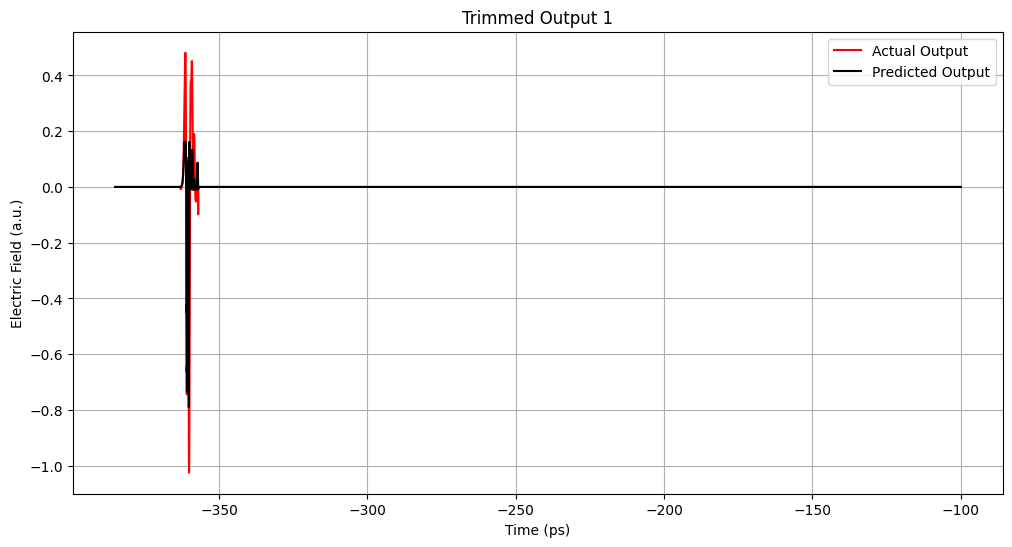

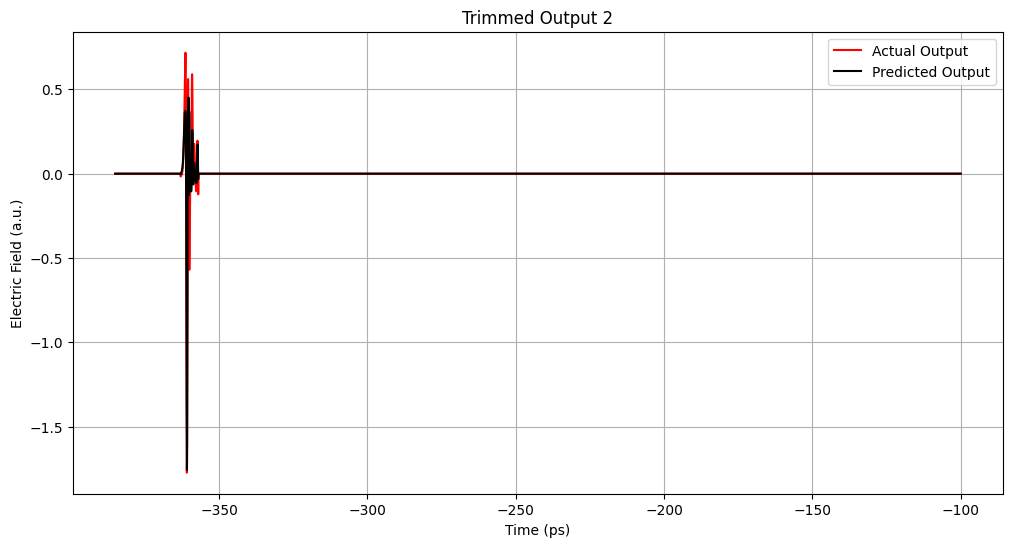

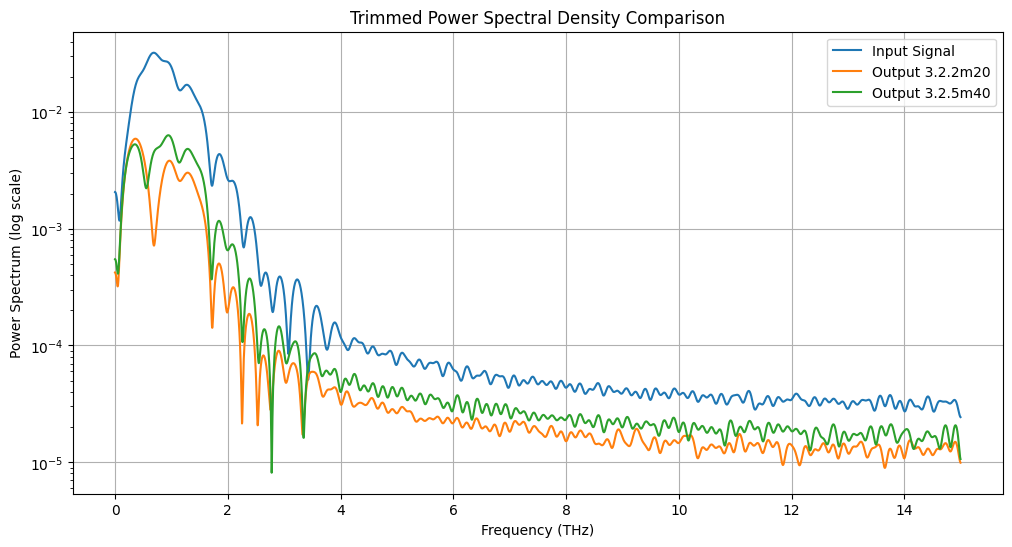

 Time axes are aligned.
 Time axes are aligned.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.fft import fft, fftfreq

""" ’Ü’•÷Ä’¥’∏÷Ç’Æ’∏÷Ç’¥ ’•’∂÷Ñ ’°’∂’∞÷Ä’°’™’•’∑’ø ’£÷Ä’°’§’°÷Ä’°’∂’∂’•÷Ä’®’ù
numpy’ù ’©’æ’°’µ’´’∂ ’∞’°’∑’æ’°÷Ä’Ø’∂’•÷Ä’´ ’∞’°’¥’°÷Ä,
pandas’ù ’ø’æ’µ’°’¨’∂’•÷Ä’´ ’Ø’°’º’°’æ’°÷Ä’¥’°’∂ ’∞’°’¥’°÷Ä,
matplotlib’ù ’£÷Ä’°÷Ü’´’Ø’∂’•÷Ä ’Ø’°’º’∏÷Ç÷Å’•’¨’∏÷Ç ’∞’°’¥’°÷Ä,
scikit-learn-’´÷Å’ù ’£’Æ’°’µ’´’∂ ’º’•’£÷Ä’•’Ω’´’°’µ’´ ’¥’∏’§’•’¨ ÷á MSE ÷Ü’∏÷Ç’∂’Ø÷Å’´’°,
scipy.fft’ù ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’´ ’∞’¶’∏÷Ä’∏÷Ç’©’µ’°’∂ ’Ω’∫’•’Ø’ø÷Ä ’£’ø’∂’•’¨’∏÷Ç ’∞’°’¥’°÷Ä÷â """

def manual_load_data(filename):
    """ ‘≤’°÷Å’æ’∏÷Ç’¥ ’ß ’ø’•÷Ñ’Ω’ø’°’µ’´’∂ ÷Ü’°’µ’¨, ÷á ’®’∂’©’•÷Ä÷Å’æ’∏÷Ç’¥ ’ß ’™’°’¥’°’∂’°’Ø’°’µ’´’∂ ’∏÷Ç ’ß’¨’•’Ø’ø÷Ä’°’Ø’°’∂ ’§’°’∑’ø’´ ’ø’æ’µ’°’¨’∂’•÷Ä’®÷â
    ‘≤’°÷Å ’•’∂ ’©’∏’≤’∂’æ’∏÷Ç’¥ ’§’°’ø’°÷Ä’Ø ÷á ’¥’•’Ø’∂’°’¢’°’∂’æ’°’Æ ’ø’∏’≤’•÷Ä’®÷â ’é’•÷Ä’°’§’°÷Ä’±’æ’∏÷Ç’¥ ’ß pandas DataFrame÷â """
    times = []
    fields = []
    with open(filename, 'r') as f:
        for line in f:
            if not line.strip() or line.startswith('#'):
                continue
            parts = line.replace(',', ' ').split()
            if len(parts) >= 2:
                try:
                    times.append(float(parts[0]))
                    fields.append(float(parts[1]))
                except ValueError:
                    continue
    return pd.DataFrame({'Time (ps)': times, 'Electric Field (a.u.)': fields})

# ’è’æ’µ’°’¨’∂’•÷Ä’´ ’∂’•÷Ä’¢’•’º’∂’∏÷Ç’¥ ÷Ü’°’µ’¨’•÷Ä’´÷Å
input_data_1 = manual_load_data('1.2.txt')
input_data_2 = manual_load_data('3.2.0.txt')
output_data_1 = manual_load_data('3.2.2m20.txt')
output_data_2 = manual_load_data('3.2.5m40.txt')

def trim_signal(time, signal, start=-363, end=-357):
    """ ‘∂÷Ä’∏’µ’°÷Å’∂’∏÷Ç’¥ ’ß ’°’¶’§’°’∂’∑’°’∂’´ ’°’µ’∂ ’∞’°’ø’æ’°’Æ’∂’•÷Ä’®, ’∏÷Ä’∏’∂÷Ñ ’§’∏÷Ç÷Ä’Ω ’•’∂ ’ø÷Ä’æ’°’Æ ’™’°’¥’°’∂’°’Ø’°’µ’´’∂ ’¥’´’ª’°’Ø’°’µ÷Ñ’´÷Å÷â """
    return np.where((time >= start) & (time <= end), signal, 0)

def calculate_power_spectrum(time, signal):
    """ ’Ä’°’∑’æ’∏÷Ç’¥ ’ß ’°’¶’§’°’∂’∑’°’∂’´ ’∞’¶’∏÷Ä’∏÷Ç’©’µ’°’∂ ’Ω’∫’•’Ø’ø÷Ä’®’ù ÷Ö’£’ø’°’£’∏÷Ä’Æ’•’¨’∏’æ ’ñ’∏÷Ç÷Ä’´’•’´ ’°÷Ä’°’£ ÷É’∏’≠’°’Ø’•÷Ä’∫’∏÷Ç’¥÷â """
    N = len(signal)
    dt = time[1] - time[0]  # ’™’°’¥’°’∂’°’Ø’°’µ’´’∂ ÷Ñ’°’µ’¨’´’∂
    yf = fft(signal)        # ’ñ’∏÷Ç÷Ä’´’•’´ ÷É’∏’≠’°’Ø’•÷Ä’∫’∏÷Ç’¥
    xf = fftfreq(N, dt)[:N//2]  # ’Ä’°’≥’°’≠’°’Ø’°’∂’∏÷Ç’©’µ’°’∂ ’°’º’°’∂÷Å÷Ñ
    power = 2/N * np.abs(yf[:N//2])  # ’Ü’∏÷Ä’¥’°’æ’∏÷Ä’æ’°’Æ ’∞’¶’∏÷Ä’∏÷Ç’©’µ’°’∂ ’°÷Ä’™’•÷Ñ’∂’•÷Ä
    return xf, power

def create_features(E, n):
    """ ’ç’ø’•’≤’Æ’∏÷Ç’¥ ’ß E, E^2, ..., E^n ÷Ü’´’π’•÷Ä’∂’•÷Ä’® ’¥’∏’§’•’¨’´ ’∞’°’¥’°÷Ä’ù ’∏’π’£’Æ’°’µ’´’∂ ’∞’°’ø’Ø’∏÷Ç’©’µ’∏÷Ç’∂’∂’•÷Ä’´ ’∞’°’¥’°÷Ä÷â """
    return np.column_stack([E**i for i in range(1, n+1)])

def train_model(input_data, output_data, n):
    """ ’à÷Ç’Ω’∏÷Ç÷Å’°’∂’∏÷Ç’¥ ’ß ’£’Æ’°’µ’´’∂ ’º’•’£÷Ä’•’Ω’´’°’µ’´ ’¥’∏’§’•’¨’ù ÷Ö’£’ø’æ’•’¨’∏’æ n ’°’Ω’ø’´’≥’°’∂’´ ÷Ü’´’π’•÷Ä’∂’•÷Ä’´÷Å÷â
    ’é’•÷Ä’°’§’°÷Ä’±’∂’∏÷Ç’¥ ’ß’ù ’¥’∏’§’•’¨, ’¥’´’ª’´’∂ ÷Ñ’°’º’°’Ø’∏÷Ç’Ω’°’µ’´’∂ ’Ω’≠’°’¨ ÷á ’Ø’°’∂’≠’°’ø’•’Ω’æ’°’Æ ’°÷Ä’™’•÷Ñ’∂’•÷Ä÷â """
    X = create_features(input_data['Electric Field (a.u.)'].values, n)
    y = output_data['Electric Field (a.u.)'].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return model, mse, y_pred

# ’ì’∏÷Ä’±’°÷Ä’Ø’æ’∏’≤ ’°’Ω’ø’´’≥’°’∂’∂’•÷Ä’®
n_values = [2, 5, 10]
models = {}

# ’Ö’∏÷Ç÷Ä’°÷Ñ’°’∂’π’µ’∏÷Ç÷Ä n-’´ ’∞’°’¥’°÷Ä ’∏÷Ç’Ω’∏÷Ç÷Å’°’∂’∏÷Ç’¥ ’•’∂÷Ñ ’¥’∏’§’•’¨ ÷á ’∫’°’∞’∏÷Ç’¥ ’°÷Ä’§’µ’∏÷Ç’∂÷Ñ’∂’•÷Ä’®
for n in n_values:
    m1, mse1, pred1 = train_model(input_data_1, output_data_1, n)
    models[f'n={n}_output1'] = {'model': m1, 'mse': mse1, 'pred': pred1}
    m2, mse2, pred2 = train_model(input_data_1, output_data_2, n)
    models[f'n={n}_output2'] = {'model': m2, 'mse': mse2, 'pred': pred2}

def plot_trimmed_comparison(input_data, output_data, model_info, n, title):
    """ ’Ü’Ø’°÷Ä’°’£÷Ä’∏÷Ç’¥ ’ß ’Ø’°’∂’≠’°’ø’•’Ω’æ’°’Æ ÷á ’´÷Ä’°’Ø’°’∂ ’•’¨÷Ñ’°’µ’´’∂ ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’®’ù ’¥’´’°’µ’∂ ’∫’∏÷Ç’¨’Ω’°’µ’´’∂ ’∞’°’ø’æ’°’Æ’∏÷Ç’¥÷â
    ’ë’∏÷Ç’µ÷Å ’ß ’ø’°’¨’´’Ω’ù ’∏÷Ä÷Ñ’°’∂’∏’æ ’¨’°’æ ’ß ’¥’∏’§’•’¨’® ’æ’•÷Ä’°÷Ä’ø’°’§÷Ä’∏÷Ç’¥ ’•’¨÷Ñ’°’µ’´’∂ ’°’¶’§’°’∂’∑’°’∂’®÷â """
    t = input_data['Time (ps)'].values
    E = input_data['Electric Field (a.u.)'].values
    X = create_features(E, n)
    y_pred = model_info['model'].predict(X)
    trimmed_actual = trim_signal(t, output_data['Electric Field (a.u.)'].values)
    trimmed_pred = trim_signal(t, y_pred)

    plt.figure(figsize=(12, 6))
    plt.plot(t, trimmed_actual, label='Actual Output', color='red')
    plt.plot(t, trimmed_pred, label='Predicted Output', color='black')
    plt.xlabel('Time (ps)')
    plt.ylabel('Electric Field (a.u.)')
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

# ’à÷Ä’∏’∂’∏÷Ç’¥ ’•’∂÷Ñ ’¨’°’æ’°’£’∏÷Ç’µ’∂ n ’°÷Ä’™’•÷Ñ’®’ù ’®’Ω’ø ’∂’æ’°’¶’°’£’∏÷Ç’µ’∂ MSE-’´
best_n1 = min(n_values, key=lambda x: models[f'n={x}_output1']['mse'])
best_n2 = min(n_values, key=lambda x: models[f'n={x}_output2']['mse'])

# ’Ü’Ø’°÷Ä’∏÷Ç’¥ ’•’∂÷Ñ ’°÷Ä’§’µ’∏÷Ç’∂÷Ñ’∂’•÷Ä’®’ù ’¨’°’æ’°’£’∏÷Ç’µ’∂ n-’∏’æ
plot_trimmed_comparison(input_data_1, output_data_1, models[f'n={best_n1}_output1'], best_n1, 'Trimmed Output 1')
plot_trimmed_comparison(input_data_1, output_data_2, models[f'n={best_n2}_output2'], best_n2, 'Trimmed Output 2')

# ’Ä’°’∑’æ’∏÷Ç’¥ ’•’∂÷Ñ ’∞’¶’∏÷Ä’∏÷Ç’©’µ’°’∂ ’Ω’∫’•’Ø’ø÷Ä’∂’•÷Ä’®’ù trimmed ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’´ ’∞’°’¥’°÷Ä
xf_input, power_input = calculate_power_spectrum(
    input_data_1['Time (ps)'].values,
    trim_signal(input_data_1['Time (ps)'].values, input_data_1['Electric Field (a.u.)'].values)
)
xf_output1, power_output1 = calculate_power_spectrum(
    output_data_1['Time (ps)'].values,
    trim_signal(output_data_1['Time (ps)'].values, output_data_1['Electric Field (a.u.)'].values)
)
xf_output2, power_output2 = calculate_power_spectrum(
    output_data_2['Time (ps)'].values,
    trim_signal(output_data_2['Time (ps)'].values, output_data_2['Electric Field (a.u.)'].values)
)

# ’Ü’Ø’°÷Ä’∏÷Ç’¥ ’•’∂÷Ñ trimmed ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’´ ’∞’¶’∏÷Ä’∏÷Ç’©’µ’°’∂ ’Ω’∫’•’Ø’ø÷Ä’∂’•÷Ä’´ ’∞’°’¥’•’¥’°’ø’∏÷Ç’©’µ’∏÷Ç’∂’®
plt.figure(figsize=(12, 6))
plt.semilogy(xf_input, power_input, label='Input Signal')
plt.semilogy(xf_output1, power_output1, label='Output 3.2.2m20')
plt.semilogy(xf_output2, power_output2, label='Output 3.2.5m40')
plt.xlabel('Frequency (THz)')
plt.ylabel('Power Spectrum (log scale)')
plt.title('Trimmed Power Spectral Density Comparison')
plt.legend()
plt.grid()
plt.show()

def check_time_alignment(input_data, output_data):
    """ ’ç’ø’∏÷Ç’£’∏÷Ç’¥ ’ß’ù ’°÷Ä’§’µ’∏÷Ñ input ÷á output ’ø’æ’µ’°’¨’∂’•÷Ä’´ ’™’°’¥’°’∂’°’Ø’°’µ’´’∂ ’°’º’°’∂÷Å÷Ñ’∂’•÷Ä’® ’∞’°’¥’®’∂’Ø’∂’∏÷Ç’¥ ’•’∂÷â
    ‘µ’©’• ’∏’π, ’°’∫’° ’°’∂’∞÷Ä’°’™’•’∑’ø ’ß ’∞’°÷Ä’¥’°÷Ä’•÷Å’∏÷Ç’¥/’´’∂’ø’•÷Ä’∫’∏’¨’µ’°÷Å’´’°÷â """
    t1 = input_data['Time (ps)'].values
    t2 = output_data['Time (ps)'].values
    if np.allclose(t1, t2):
        print(" Time axes are aligned.")
    else:
        print("Time axes are NOT aligned. Consider interpolating or aligning.")

# ’ç’ø’∏÷Ç’£’∏÷Ç’¥ ’•’∂÷Ñ ’™’°’¥’°’∂’°’Ø’°’µ’´’∂ ’∞’°’¥’®’∂’Ø’∂’∏÷Ç’¥’®’ù ’∂’°’≠÷Ñ’°’∂ ’¥’∏’§’•’¨’´ ’∏÷Ç’Ω’∏÷Ç÷Å’∏÷Ç’¥’®
check_time_alignment(input_data_1, output_data_1)
check_time_alignment(input_data_1, output_data_2)


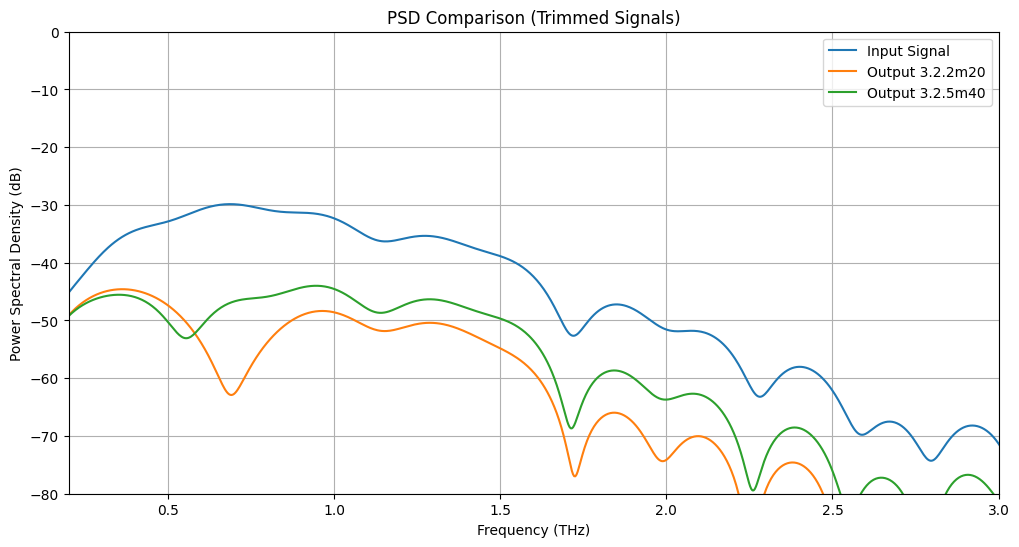

In [14]:
def trim_signal_in_time(time, signal, t_min=-363, t_max=-357):
    """ ‘ø’ø÷Ä’∏÷Ç’¥ ’•’∂÷Ñ ’°’¶’§’°’∂’∑’°’∂’´ ’™’°’¥’°’∂’°’Ø’°’µ’´’∂ ’∞’°’ø’æ’°’Æ’® ’¥’´’°’µ’∂ [t_min, t_max] ’¥’´’ª’°’Ø’°’µ÷Ñ’∏÷Ç’¥÷â
    ’Ñ’∂’°÷Å’°’Æ ’∞’°’ø’æ’°’Æ’∂’•÷Ä’® ’¶÷Ä’∏’µ’°÷Å’∂’∏÷Ç’¥ ’•’∂÷Ñ÷â """
    return np.where((time >= t_min) & (time <= t_max), signal, 0)

def calculate_power_spectrum_dB(time, signal):
    """ ’Ä’°’∑’æ’∏÷Ç’¥ ’•’∂÷Ñ ’°’¶’§’°’∂’∑’°’∂’´ ’∞’¶’∏÷Ä’∏÷Ç’©’µ’°’∂ ’Ω’∫’•’Ø’ø÷Ä’® (Power Spectral Density) ’§’•÷Å’´’¢’•’¨’°’µ’´’∂ ’Ω’°’∂’§’≤’°’Ø’∏’æ÷â
    ’ï’£’ø’°’£’∏÷Ä’Æ’∏÷Ç’¥ ’•’∂÷Ñ FFT’ù ÷Ü÷Ä’•÷Ñ’æ’•’∂’Ω’´’°’∂’•÷Ä’´ ÷á ’∞’¶’∏÷Ä’∏÷Ç’©’µ’°’∂ ’§’´’Ω’ø÷Ä’´’¢’µ’∏÷Ç÷Å’´’°’µ’´ ’Ω’ø’°÷Å’¥’°’∂ ’∞’°’¥’°÷Ä÷â
    1e-12 ’°’æ’•’¨’°÷Å’∂’∏÷Ç’¥ ’•’∂÷Ñ’ù log(0)-’´÷Å ’≠’∏÷Ç’Ω’°÷É’•’¨’∏÷Ç ’∞’°’¥’°÷Ä÷â """
    N = len(signal)
    dt = time[1] - time[0]               # ’™’°’¥’°’∂’°’Ø’°’µ’´’∂ ÷Ñ’°’µ’¨’´’∂’ù ’∂’¥’∏÷Ç’∑’∂’•÷Ä’´ ’¥’´’ª÷á
    yf = fft(signal)                    # Fast Fourier Transform’ù ’Ω’ø’°’∂’°’¨’∏÷Ç ’Ω’∫’•’Ø’ø÷Ä
    xf = fftfreq(N, dt)[:N//2]         # ’Ä’°’≥’°’≠’°’Ø’°’∂’∏÷Ç’©’µ’°’∂ ’°’º’°’∂÷Å÷Ñ’ù ’¥’´’°’µ’∂ ’°’º’°’ª’´’∂ ’Ø’•’Ω’® (’∂’∏÷Ç’µ’∂’∂ ’ß ’Ω’∫’•’Ø’ø÷Ä’´ ’∞’°’¥’°÷Ä)
    power_linear = (2.0 / N) * np.abs(yf[:N//2])   # ’Ü’∏÷Ä’¥’°’æ’∏÷Ä’æ’°’Æ ’∞’¶’∏÷Ä’∏÷Ç’©’µ’∏÷Ç’∂
    power_dB = 20 * np.log10(power_linear + 1e-12) # ‘¥’•÷Å’´’¢’•’¨’°’µ’´’∂ ’Ω’°’∂’§’≤’°’Ø’ù ’≠’∏÷Ç’Ω’°÷É’•’¨’∏’æ log(0)-’´÷Å
    return xf, power_dB

# --- ‘ø’ø÷Ä’∏÷Ç’¥ ’•’∂÷Ñ ’¥’´’°’µ’∂ ’∫’∏÷Ç’¨’Ω’°’µ’´’∂ ’∞’°’ø’æ’°’Æ’∂’•÷Ä’® (trim)’ù input ÷á ’•÷Ä’Ø’∏÷Ç ’ø’°÷Ä’¢’•÷Ä output ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’´ ’∞’°’¥’°÷Ä ---
trimmed_input = trim_signal_in_time(input_data_1['Time (ps)'].values,
                                     input_data_1['Electric Field (a.u.)'].values)
trimmed_output1 = trim_signal_in_time(output_data_1['Time (ps)'].values,
                                      output_data_1['Electric Field (a.u.)'].values)
trimmed_output2 = trim_signal_in_time(output_data_2['Time (ps)'].values,
                                      output_data_2['Electric Field (a.u.)'].values)

# --- ’Ä’°’∑’æ’∏÷Ç’¥ ’•’∂÷Ñ PSD (Power Spectral Density) ’§’•÷Å’´’¢’•’¨’°’µ’´’∂ ’Ω’°’∂’§’≤’°’Ø’∏’æ ---
xf_input, psd_input = calculate_power_spectrum_dB(input_data_1['Time (ps)'].values, trimmed_input)
xf_output1, psd_output1 = calculate_power_spectrum_dB(output_data_1['Time (ps)'].values, trimmed_output1)
xf_output2, psd_output2 = calculate_power_spectrum_dB(output_data_2['Time (ps)'].values, trimmed_output2)

# --- ‘≥’Æ’°’∫’°’ø’Ø’•÷Ä: ’Ä’¶’∏÷Ä’∏÷Ç’©’µ’°’∂ ’Ω’∫’•’Ø’ø÷Ä’´ ’∞’°’¥’•’¥’°’ø’∏÷Ç’©’µ’∏÷Ç’∂ trimmed ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’´ ’∞’°’¥’°÷Ä ---
plt.figure(figsize=(12, 6))
plt.plot(xf_input, psd_input, label='Input Signal')            # ’Ü’•÷Ä’¥’∏÷Ç’Æ’æ’°’Æ ’°’¶’§’°’∂’∑’°’∂
plt.plot(xf_output1, psd_output1, label='Output 3.2.2m20')     # ‘±’º’°’ª’´’∂ ’•’¨÷Ñ’°’µ’´’∂ ’°’¶’§’°’∂’∑’°’∂
plt.plot(xf_output2, psd_output2, label='Output 3.2.5m40')     # ‘µ÷Ä’Ø÷Ä’∏÷Ä’§ ’•’¨÷Ñ’°’µ’´’∂ ’°’¶’§’°’∂’∑’°’∂
plt.xlim(0.2, 3)                                               # ’ç’°’∞’¥’°’∂’∏÷Ç’¥ ’•’∂÷Ñ ’∞’•’ø’°÷Ñ÷Ä÷Ñ’´÷Ä ’∞’°’≥’°’≠’°’Ø’°’∂’∏÷Ç’©’µ’°’∂ ’ø’´÷Ä’∏÷Ç’µ’©’®’ù (0.2 ‚Äì 3 THz)
plt.ylim(-80, 0)                                               # ‘¥’•÷Å’´’¢’•’¨’°’µ’´’∂ ’Ω’°’∂’§’≤’°’Ø’ù -80-’´÷Å ’¥’´’∂’π÷á 0 dB
plt.xlabel('Frequency (THz)')                                  # ’Ä’°’≥’°’≠’°’Ø’°’∂’∏÷Ç’©’µ’°’∂ ’°’º’°’∂÷Å÷Ñ
plt.ylabel('Power Spectral Density (dB)')                      # ’à÷Ç’™’£’∂’∏÷Ç’©’µ’°’∂ ’°’º’°’∂÷Å÷Ñ’ù ’§’•÷Å’´’¢’•’¨’∂’•÷Ä’∏’æ
plt.title('PSD Comparison (Trimmed Signals)')                  # ‘≥÷Ä’°÷Ü’´’Ø’´ ’æ’•÷Ä’∂’°’£’´÷Ä
plt.grid(True)                                                 # ’ë’°’∂÷Å’ù ’∞’•’∑’ø ’∞’°’¥’•’¥’°’ø’∏÷Ç’©’µ’°’∂ ’∞’°’¥’°÷Ä
plt.legend()                                                   # ‘º’•’£’•’∂’§’ù ’ø’°÷Ä’¢’•÷Ä ’£’Æ’•÷Ä’´ ’∂’∑’¥’°’¥’¢
plt.show()                                                     # ’ë’∏÷Ç÷Å’°’§÷Ä’∏÷Ç’¥ ’•’∂÷Ñ ’£’Æ’°’∫’°’ø’Ø’•÷Ä’®


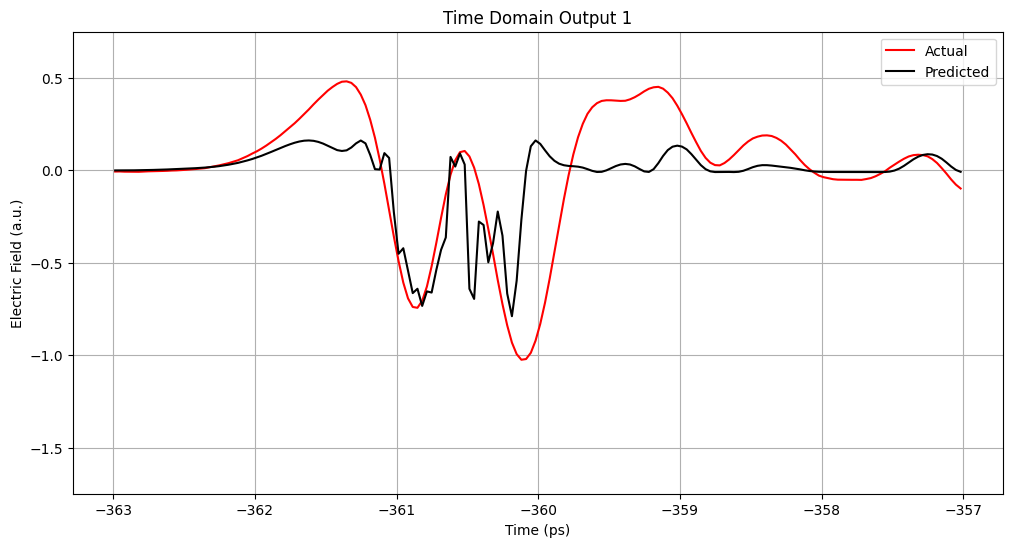

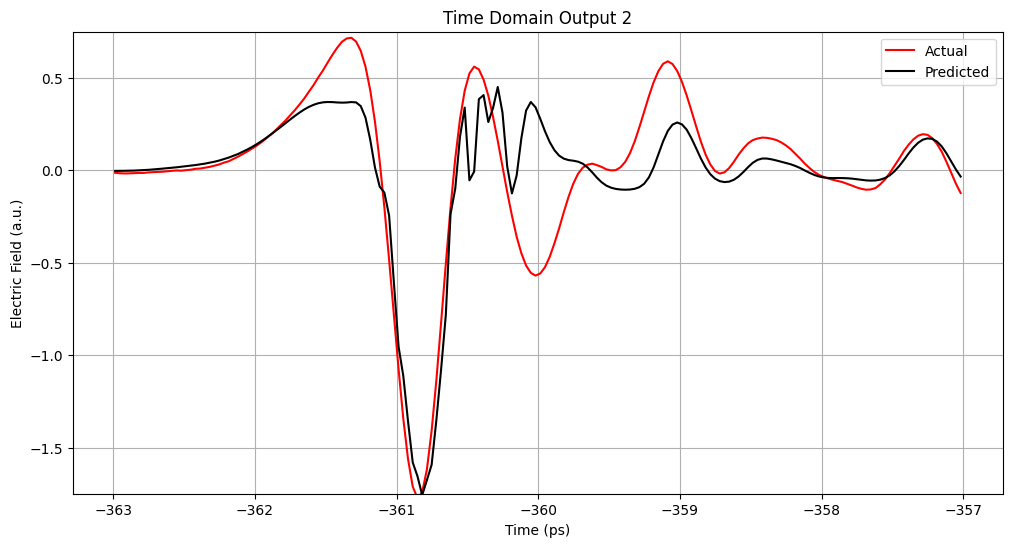

In [17]:
def plot_time_trimmed_output(input_data, output_data, model_info, n, title):
    """ 
    ’Ü’Ø’°÷Ä’∏÷Ç’¥ ’ß ’Ø’°’∂’≠’°’ø’•’Ω’æ’°’Æ ÷á ’´÷Ä’°’Ø’°’∂ ’•’¨÷Ñ’°’µ’´’∂ ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’® ’™’°’¥’°’∂’°’Ø’°’µ’´’∂ ’ø’´÷Ä’∏÷Ç’µ’©’∏÷Ç’¥’ù ’¥’´’°’µ’∂ ’∫’∏÷Ç’¨’Ω’°’µ’´’∂ ’¥’´’ª’°’Ø’°’µ÷Ñ’∏÷Ç’¥÷â 
    
    ’Ñ’∏÷Ç’ø÷Ñ’ù
        input_data ‚Äî pandas DataFrame, ’∫’°÷Ä’∏÷Ç’∂’°’Ø’∏÷Ç’¥ ’ß 'Time (ps)' ÷á 'Electric Field (a.u.)'
        output_data ‚Äî pandas DataFrame, ’∂’∏÷Ç’µ’∂ ’Ø’°’º’∏÷Ç÷Å’æ’°’Æ÷Ñ’∏’æ’ù ’Ω’∫’°’Ω’æ’∏’≤ ’•’¨÷Ñ
        model_info ‚Äî ’¢’°’º’°÷Ä’°’∂, ’∏÷Ä’∂ ’∏÷Ç’∂’´ ’∏÷Ç’Ω’∏÷Ç÷Å’æ’°’Æ ’¥’∏’§’•’¨’ù key 'model'
        n ‚Äî ’∫’∏’¨’´’∂’∏’¥’´ ’°’Ω’ø’´’≥’°’∂ (feature-’´ ’°’Ω’ø’´’≥’°’∂, ’∏÷Ä’® ’Ø’´÷Ä’°’º’æ’•’¨ ’ß train ’™’°’¥’°’∂’°’Ø)
        title ‚Äî ’£÷Ä’°÷Ü’´’Ø’´ ’æ’•÷Ä’∂’°’£’´÷Ä
    """

    # --- Step 1: ’ç’ø’°’∂’∏÷Ç’¥ ’•’∂÷Ñ ’™’°’¥’°’∂’°’Ø’°’µ’´’∂ ÷á ’´’∂÷É’∏÷Ç’© ’ß’¨’•’Ø’ø÷Ä’°’Ø’°’∂ ’§’°’∑’ø’´ ’°÷Ä’™’•÷Ñ’∂’•÷Ä’® ---
    t = input_data['Time (ps)'].values
    E = input_data['Electric Field (a.u.)'].values

    # --- Step 2: ’ç’ø’•’≤’Æ’∏÷Ç’¥ ’•’∂÷Ñ ’∂’∏÷Ç’µ’∂ ’∫’∏’¨’´’∂’∏’¥ ÷Ü’´’π’•÷Ä’∂’•÷Ä’® ’´’∂’π train-’´ ’™’°’¥’°’∂’°’Ø ---
    X = np.column_stack([E**i for i in range(1, n+1)])
    y_pred = model_info['model'].predict(X)  # ‘ø’°’∂’≠’°’ø’•’Ω’∏÷Ç’¥

    # --- Step 3: ’è’•’≤’´ ’ß ’∏÷Ç’∂’•’∂’∏÷Ç’¥ trimmed ’∞’°’ø’æ’°’Æ’´ ’°’º’°’∂’±’∂’°÷Å’∏÷Ç’¥’ù ’®’Ω’ø ’™’°’¥’°’∂’°’Ø’´ ---
    mask = (t >= -363) & (t <= -357)
    t_trim = t[mask]                             # Trimmed ’™’°’¥’°’∂’°’Ø
    y_actual_trim = output_data['Electric Field (a.u.)'].values[mask]  # ‘ª÷Ä’°’Ø’°’∂ trimmed ’•’¨÷Ñ
    y_pred_trim = y_pred[mask]                   # ‘ø’°’∂’≠’°’ø’•’Ω’æ’°’Æ trimmed ’•’¨÷Ñ

    # --- Step 4: ’Ü’Ø’°÷Ä’°’£÷Ä’∏÷Ç’¥ ’•’∂÷Ñ trimmed ’∞’°’ø’æ’°’Æ’´ ’´÷Ä’°’Ø’°’∂ ÷á ’Ø’°’∂’≠’°’ø’•’Ω’æ’°’Æ ’•’¨÷Ñ’°’µ’´’∂ ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’® ---
    plt.figure(figsize=(12, 6))
    plt.plot(t_trim, y_actual_trim, label='Actual', color='red')     # ‘ª÷Ä’°’Ø’°’∂ ’•’¨÷Ñ (’Ø’°÷Ä’¥’´÷Ä)
    plt.plot(t_trim, y_pred_trim, label='Predicted', color='black')  # ‘ø’°’∂’≠’°’ø’•’Ω’æ’°’Æ ’•’¨÷Ñ (’Ω÷á)
    plt.ylim(-1.75, 0.75)                                             # ’é’´’¶’∏÷Ç’°’¨ ’∞’°÷Ä’¥’°÷Ä y-’∑’•’≤’∏÷Ç’¥
    plt.xlabel('Time (ps)')
    plt.ylabel('Electric Field (a.u.)')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()
plot_time_trimmed_output(
    input_data_1, output_data_1, models[f'n={best_n1}_output1'], best_n1, 
    'Time Domain Output 1'
)

plot_time_trimmed_output(
    input_data_1, output_data_2, models[f'n={best_n2}_output2'], best_n2, 
    'Time Domain Output 2'
)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def create_features(E, n):
    """ ’ç’ø’•’≤’Æ’∏÷Ç’¥ ’ß n ’°’Ω’ø’´’≥’°’∂’´ ’∫’∏’¨’´’∂’∏’¥ ÷Ü’´’π’•÷Ä’∂’•÷Ä’ù [E, E^2, ..., E^n]÷â
    ’Ñ’∏÷Ç’ø÷Ñ’ù 
        E - numpy ’¶’°’∂’£’æ’°’Æ (’ß’¨’•’Ø’ø÷Ä’°’Ø’°’∂ ’§’°’∑’ø’´ ’°÷Ä’™’•÷Ñ’∂’•÷Ä)
        n - ’∫’∏’¨’´’∂’∏’¥’´ ’°’º’°’æ’•’¨’°’£’∏÷Ç’µ’∂ ’°’Ω’ø’´’≥’°’∂
    ‘µ’¨÷Ñ’ù 
        ÷Ü’´’π’•÷Ä’∂’•÷Ä’´ ’¥’°’ø÷Ä’´÷Å’ù ’∏÷Ä’´ ’Ω’µ’∏÷Ç’∂’°’Ø’∂’•÷Ä’∂ ’•’∂ E^1, E^2, ..., E^n
    """
    return np.column_stack([E**i for i in range(1, n+1)])

def train_model_no_scaling(input_data, output_data, n):
    """ ’à÷Ç’Ω’∏÷Ç÷Å’°’∂’∏÷Ç’¥ ’ß ’£’Æ’°’µ’´’∂ ’º’•’£÷Ä’•’Ω’´’∏’∂ ’¥’∏’§’•’¨’ù ÷Ö’£’ø’°’£’∏÷Ä’Æ’•’¨’∏’æ n ’°’Ω’ø’´’≥’°’∂’´ ’∫’∏’¨’´’∂’∏’¥ ÷Ü’´’π’•÷Ä’∂’•÷Ä÷â
    
    ’Ñ’∏÷Ç’ø÷Ñ’ù
        input_data - pandas DataFrame, ’∏÷Ä’® ’∫’°÷Ä’∏÷Ç’∂’°’Ø’∏÷Ç’¥ ’ß 'Electric Field (a.u.)' ’Ω’µ’∏÷Ç’∂’°’Ø (’´’∂÷É’∏÷Ç’ø)
        output_data - pandas DataFrame, ’∏÷Ä’® ’∫’°÷Ä’∏÷Ç’∂’°’Ø’∏÷Ç’¥ ’ß 'Electric Field (a.u.)' ’Ω’µ’∏÷Ç’∂’°’Ø (’•’¨÷Ñ)
        n - ’∫’∏’¨’´’∂’∏’¥’´ ’°’Ω’ø’´’≥’°’∂’®
        
    ‘ø’°’ø’°÷Ä’∏÷Ç’¥ ’ß’ù
        - ÷Ü’´’π’•÷Ä’∂’•÷Ä’´ ’¥’°’ø÷Ä’´÷Å’´ ’Ω’ø’•’≤’Æ’∏÷Ç’¥ (’¢’°’º’°÷Å’´’∏÷Ä’•’∂ ’°’º’°’∂÷Å ’Ω’Ø’•’µ’¨’´’∂’£’´)
        - ’¥’∏’§’•’¨’´ ’∏÷Ç’Ω’∏÷Ç÷Å’∏÷Ç’¥ (LinearRegression)
        - ’Ø’°’∂’≠’°’ø’•’Ω’∏÷Ç’¥
        - ’¥’´’ª’´’∂ ÷Ñ’°’º’°’Ø’∏÷Ç’Ω’°’µ’´’∂ ’Ω’≠’°’¨’´ ’∞’°’∑’æ’°÷Ä’Ø
        
    ‘µ’¨÷Ñ’ù
        model - ’∏÷Ç’Ω’∏÷Ç÷Å’æ’°’Æ LinearRegression ’¥’∏’§’•’¨
        mse - ’¥’´’ª’´’∂ ÷Ñ’°’º’°’Ø’∏÷Ç’Ω’°’µ’´’∂ ’Ω’≠’°’¨ (mean squared error)
    """
    X = create_features(input_data['Electric Field (a.u.)'].values, n)
    y = output_data['Electric Field (a.u.)'].values
    
    model = LinearRegression()
    model.fit(X, y)  # ’Ñ’∏’§’•’¨’´ ’∏÷Ç’Ω’∏÷Ç÷Å’∏÷Ç’¥
    
    y_pred = model.predict(X)  # ‘ø’°’∂’≠’°’ø’•’Ω’∏÷Ç’¥’ù ’∂’∏÷Ç’µ’∂ ’ø’æ’µ’°’¨’∂’•÷Ä’´ ’æ÷Ä’°
    mse = mean_squared_error(y, y_pred)  # ’î’°’∂’°’Ø’°’Ø’°’∂ ’Ω’≠’°’¨’´ ’£’∂’°’∞’°’ø’∏÷Ç’¥
    
    print(f"Model trained with n={n}, MSE = {mse:.6f}")
    return model, mse


In [19]:
n_values = [2, 5, 10]  
""" ’ç’° ’°’µ’∂ ’∫’∏’¨’´’∂’∏’¥ ’°’Ω’ø’´’≥’°’∂’∂’•÷Ä’´ ÷Å’°’∂’Ø’∂ ’ß, ’∏÷Ä’∏’∂÷Å’∏’æ ’∏÷Ç’¶’∏÷Ç’¥ ’•’∂÷Ñ ’∏÷Ç’Ω’∏÷Ç÷Å’°’∂’•’¨ ’¥’∏’§’•’¨’∂’•÷Ä’®÷â
’ì’∏÷Ä’±’∏÷Ç’¥ ’•’∂÷Ñ 2-÷Ä’§, 5-÷Ä’§ ÷á 10-÷Ä’§ ’°’Ω’ø’´’≥’°’∂’´ ’º’•’£÷Ä’•’Ω’´’∏’∂ ’¥’∏’§’•’¨’∂’•÷Ä÷â """

models = {}  
""" ’ç’° ’§’°’ø’°÷Ä’Ø ’¢’°’º’°÷Ä’°’∂ ’ß, ’∏÷Ä’ø’•’≤ ’∫’°’∞’∫’°’∂’•’¨’∏÷Ç ’•’∂÷Ñ ’µ’∏÷Ç÷Ä’°÷Ñ’°’∂’π’µ’∏÷Ç÷Ä ’¥’∏’§’•’¨’´ ’∫’°÷Ä’°’¥’•’ø÷Ä’•÷Ä’®’ù 
’∞’°’¥’°’∫’°’ø’°’Ω’≠’°’∂’°’¢’°÷Ä ’•’¨÷Ñ’°’µ’´’∂ ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’´ ’∞’°’¥’°÷Ä ('output1' ÷á 'output2')÷â
‘≤’°’∂’°’¨’´’∂ ’Ø’¨’´’∂’´ ÷Ö÷Ä’´’∂’°’Ø’ù 'n=2_output1'÷â
‘±÷Ä’™’•÷Ñ’®’ù {'model': <LinearRegression>, 'mse': ...} 
"""

for n in n_values:
    """ ’ä’ø’ø’æ’∏÷Ç’¥ ’•’∂÷Ñ ’µ’∏÷Ç÷Ä’°÷Ñ’°’∂’π’µ’∏÷Ç÷Ä ’∫’∏’¨’´’∂’∏’¥ ’°’Ω’ø’´’≥’°’∂’´ ’∞’°’¥’°÷Ä’ù n=2, 5, 10÷â """

    model1, mse1 = train_model_no_scaling(input_data_1, output_data_1, n)
    """ ’à÷Ç’Ω’∏÷Ç÷Å’°’∂’∏÷Ç’¥ ’•’∂÷Ñ ’¥’∏’§’•’¨ `input_data_1` ÷á `output_data_1`-’´ ’∞’°’¥’°÷Ä’ù ’°’º’°’∂÷Å ’Ω’Ø’•’µ’¨’´’∂’£’´÷â
    ’ç’ø’°’∂’∏÷Ç’¥ ’•’∂÷Ñ ’¥’∏’§’•’¨ ÷á ’§÷Ä’° ’¥’´’ª’´’∂ ÷Ñ’°’º’°’Ø’∏÷Ç’Ω’°’µ’´’∂ ’Ω’≠’°’¨’® (MSE)÷â """

    models[f'n={n}_output1'] = {'model': model1, 'mse': mse1}
    """ ‘±÷Ä’§’µ’∏÷Ç’∂÷Ñ’® ’∫’°’∞’∏÷Ç’¥ ’•’∂÷Ñ ’¢’°’º’°÷Ä’°’∂’∏÷Ç’¥’ù ’¢’°’∂’°’¨’´’∂ ’Ø’°’¶’¥’•’¨’∏’æ ’®’Ω’ø ’°’Ω’ø’´’≥’°’∂’´ ÷á ’•’¨÷Ñ’´ ’°’∂’∏÷Ç’∂’´÷â """

    model2, mse2 = train_model_no_scaling(input_data_1, output_data_2, n)
    """ ‘ø÷Ä’Ø’∂’∏÷Ç’¥ ’•’∂÷Ñ ’∂’∏÷Ç’µ’∂’®’ù ’•÷Ä’Ø÷Ä’∏÷Ä’§ ’•’¨÷Ñ’´ ’∞’°’¥’°÷Ä (`output_data_2`)÷â """

    models[f'n={n}_output2'] = {'model': model2, 'mse': mse2}
    """ ’ä’°’∞’∫’°’∂’∏÷Ç’¥ ’•’∂÷Ñ ’•÷Ä’Ø÷Ä’∏÷Ä’§ ’•’¨÷Ñ’´ ’¥’∏’§’•’¨’∂ ’∏÷Ç ’Ω’≠’°’¨’®÷â """


Model trained with n=2, MSE = 0.001970
Model trained with n=2, MSE = 0.001465
Model trained with n=5, MSE = 0.001882
Model trained with n=5, MSE = 0.001401
Model trained with n=10, MSE = 0.001643
Model trained with n=10, MSE = 0.001228


In [40]:
def print_coefficients(model_info, n):
    """
    ’è’∫’∏÷Ç’¥ ’ß ’º’•’£÷Ä’•’Ω’´’∏’∂ ’¥’∏’§’•’¨’´ ’Ø’∏’•÷Ü’´÷Å’´’•’∂’ø’∂’•÷Ä’®’ù ’∂’•÷Ä’°’º’µ’°’¨ ’´’∂’ø’•÷Ä’∫÷Å’´’°’∂ ÷á ’µ’∏÷Ç÷Ä’°÷Ñ’°’∂’π’µ’∏÷Ç÷Ä ’°’Ω’ø’´’≥’°’∂’´ ’Ø’∑’´’º’®÷â

    ’Ñ’∏÷Ç’ø÷Ñ’ù
        model_info ‚Äî ’¢’°’º’°÷Ä’°’∂, ’∏÷Ä’® ’∫’°÷Ä’∏÷Ç’∂’°’Ø’∏÷Ç’¥ ’ß 'model' ’¢’°’∂’°’¨’´’∏’æ LinearRegression ÷Ö’¢’µ’•’Ø’ø
        n ‚Äî ’∫’∏’¨’´’∂’∏’¥ ’°’Ω’ø’´’≥’°’∂, ’∏÷Ä’® ÷Å’∏÷Ç’µ÷Å ’ß ’ø’°’¨’´’Ω ÷Ü’´’π’•÷Ä’∂’•÷Ä’´ ÷Ñ’°’∂’°’Ø’® (E, E^2, ..., E^n)
    """

    model = model_info['model']  # ’ç’ø’°’∂’∏÷Ç’¥ ’•’∂÷Ñ LinearRegression ’¥’∏’§’•’¨’®
    print(f"\nCoefficients for n={n}:")  # ’è’∫’∏÷Ç’¥ ’•’∂÷Ñ ’æ’•÷Ä’∂’°’£’´÷Ä’ù ’∏÷Ä n-’´ ’∞’°’¥’°÷Ä ’ß

    # ’è’∫’∏÷Ç’¥ ’•’∂÷Ñ ’´’∂’ø’•÷Ä’∫÷Å’´’°’∂’ù ’¥’∏’§’•’¨’´ ’∞’´’¥’∂’°’£’´’Æ’®, ’•÷Ä’¢ ’¢’∏’¨’∏÷Ä E^i-’∂’•÷Ä’® 0 ’•’∂
    print(f"Intercept (m): {model.intercept_:.6f}")

    # ’è’∫’∏÷Ç’¥ ’•’∂÷Ñ ’µ’∏÷Ç÷Ä’°÷Ñ’°’∂’π’µ’∏÷Ç÷Ä ’Ø’∑’´’º (’Ø’∏’•÷Ü’´÷Å’´’•’∂’ø) ’®’Ω’ø ’∫’∏’¨’´’∂’∏’¥’´ ’°’Ω’ø’´’≥’°’∂’´’ù E^1, E^2, ..., E^n
    for i, coef in enumerate(model.coef_, 1):
        print(f"a{i}: {coef:.6f}")  # ÷Ö÷Ä’´’∂’°’Ø’ù a1: ..., a2: ..., ÷á ’°’µ’¨’∂
for n in n_values:
    print_coefficients(models[f'n={n}_output1'], n)  # ’è’∫’∏÷Ç’¥ ’•’∂÷Ñ ’°’º’°’ª’´’∂ ’•’¨÷Ñ’´ ’¥’∏’§’•’¨’´ ’Ø’∏’•÷Ü’´÷Å’´’•’∂’ø’∂’•÷Ä’®
    print_coefficients(models[f'n={n}_output2'], n)  # ’è’∫’∏÷Ç’¥ ’•’∂÷Ñ ’•÷Ä’Ø÷Ä’∏÷Ä’§ ’•’¨÷Ñ’´ ’¥’∏’§’•’¨’´ ’Ø’∏’•÷Ü’´÷Å’´’•’∂’ø’∂’•÷Ä’®



Coefficients for n=2:
Intercept (m): 0.001745
a1: -0.011706
a2: -0.013926

Coefficients for n=2:
Intercept (m): 0.001249
a1: 0.136104
a2: -0.010460

Coefficients for n=5:
Intercept (m): 0.001888
a1: 0.057779
a2: -0.035404
a3: -0.005096
a4: 0.000654
a5: 0.000099

Coefficients for n=5:
Intercept (m): 0.001238
a1: 0.198218
a2: -0.021221
a3: -0.004409
a4: 0.000214
a5: 0.000058

Coefficients for n=10:
Intercept (m): 0.000584
a1: 0.073115
a2: 0.128939
a3: -0.022537
a4: -0.038445
a5: -0.001807
a6: 0.002579
a7: 0.000335
a8: -0.000042
a9: -0.000010
a10: -0.000000

Coefficients for n=10:
Intercept (m): 0.000146
a1: 0.215685
a2: 0.114681
a3: -0.021824
a4: -0.031635
a5: -0.001181
a6: 0.002087
a7: 0.000259
a8: -0.000034
a9: -0.000008
a10: -0.000000


In [41]:
from sklearn.linear_model import Ridge, Lasso

def train_model_on_trimmed(E_input_trim, E_output_trim, n, model_type='ridge', alpha=1.0):
    """
    ’à÷Ç’Ω’∏÷Ç÷Å’°’∂’∏÷Ç’¥ ’ß Ridge ’Ø’°’¥ Lasso ’º’•’£÷Ä’•’Ω’´’°’ù trimmed (’Ø’ø÷Ä’æ’°’Æ) ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’´ ’æ÷Ä’°’ù ÷Ö’£’ø’°’£’∏÷Ä’Æ’•’¨’∏’æ ’∫’∏’¨’´’∂’∏’¥ ÷Ü’´’π’•÷Ä’∂’•÷Ä÷â

    ’Ñ’∏÷Ç’ø÷Ñ’ù
        E_input_trim ‚Äî numpy ’¶’°’∂’£’æ’°’Æ, trimmed ’´’∂÷É’∏÷Ç’ø ’°’¶’§’°’∂’∑’°’∂ (Electric Field)
        E_output_trim ‚Äî numpy ’¶’°’∂’£’æ’°’Æ, trimmed ’•’¨÷Ñ’°’µ’´’∂ ’°’¶’§’°’∂’∑’°’∂ (Electric Field)
        n ‚Äî ’∫’∏’¨’´’∂’∏’¥ ÷Ü’´’π’•÷Ä’∂’•÷Ä’´ ’°’º’°’æ’•’¨’°’£’∏÷Ç’µ’∂ ’°’Ω’ø’´’≥’°’∂
        model_type ‚Äî 'ridge' ’Ø’°’¥ 'lasso', ’∏÷Ä’∏’∑’∏÷Ç’¥ ’ß ’©’• ’∏÷Ä ’¥’∏’§’•’¨’∂ ÷Ö’£’ø’°’£’∏÷Ä’Æ’•’¨
        alpha ‚Äî ’Ø’°÷Ä’£’°’æ’∏÷Ä’¥’°’∂ ’∫’°÷Ä’°’¥’•’ø÷Ä (regularization strength)

    ‘µ’¨÷Ñ’ù
        model ‚Äî ’∏÷Ç’Ω’∏÷Ç÷Å’æ’°’Æ Ridge ’Ø’°’¥ Lasso ’¥’∏’§’•’¨
        mse ‚Äî ’∏÷Ç’Ω’∏÷Ç÷Å’¥’°’∂ ’ø’æ’µ’°’¨’∂’•÷Ä’´ ’æ÷Ä’° ’∞’°’∑’æ’æ’°’Æ ’¥’´’ª’´’∂ ÷Ñ’°’º’°’Ø’∏÷Ç’Ω’°’µ’´’∂ ’Ω’≠’°’¨’®
    """

    # --- ’ç’ø’•’≤’Æ’∏÷Ç’¥ ’•’∂÷Ñ ’∫’∏’¨’´’∂’∏’¥ ÷Ü’´’π’•÷Ä’∂’•÷Ä’ù [E, E^2, ..., E^n] ---
    X = create_features(E_input_trim, n)
    y = E_output_trim

    # --- ‘∏’∂’ø÷Ä’∏÷Ç’¥ ’•’∂÷Ñ ’¥’∏’§’•’¨’´ ’ø’´’∫’®’ù Ridge ’Ø’°’¥ Lasso ---
    if model_type == 'ridge':
        model = Ridge(alpha=alpha)
    elif model_type == 'lasso':
        model = Lasso(alpha=alpha, max_iter=10000)
    else:
        raise ValueError("Unknown model type.")  # ’ç’≠’°’¨ ’¥’∏’§’•’¨’´ ’°’∂’∏÷Ç’∂’´ ’§’•’∫÷Ñ’∏÷Ç’¥

    # --- ’à÷Ç’Ω’∏÷Ç÷Å’∏÷Ç’¥ ÷á ’Ø’°’∂’≠’°’ø’•’Ω’∏÷Ç’¥ ---
    model.fit(X, y)                  # ’Ñ’∏’§’•’¨’´ ’∏÷Ç’Ω’∏÷Ç÷Å’∏÷Ç’¥
    y_pred = model.predict(X)       # ‘ø’°’∂’≠’°’ø’•’Ω’∏÷Ç’¥ ’∂’∏÷Ç’µ’∂ ÷Ü’´’π’•÷Ä’∂’•÷Ä’´ ’æ÷Ä’°
    mse = mean_squared_error(y, y_pred)  # MSE ’∞’°’∑’æ’°÷Ä’Ø’ù ’∏÷Ä’∫’•’Ω ’Ω’≠’°’¨’´ ’π’°÷É’°’∂’´’∑

    # --- ’è’∫’∏÷Ç’¥ ’•’∂÷Ñ ’°÷Ä’§’µ’∏÷Ç’∂÷Ñ’∂’•÷Ä’® ---
    print(f"{model_type.capitalize()} Regression | n={n}, alpha={alpha} | MSE = {mse:.6f}")

    return model, mse


In [42]:
n_values = [2, 5, 10]  
""" ’ç’ø’•’≤’Æ’∏÷Ç’¥ ’•’∂÷Ñ ’∫’∏’¨’´’∂’∏’¥ ’°’Ω’ø’´’≥’°’∂’∂’•÷Ä’´ ÷Å’∏÷Ç÷Å’°’Ø’ù ’∏÷Ä’∏’∂÷Å’∏’æ ’∏÷Ç’¶’∏÷Ç’¥ ’•’∂÷Ñ ÷É’∏÷Ä’±’°÷Ä’Ø’•’¨ ’¥’∏’§’•’¨’∂’•÷Ä’®÷â """

alphas = {'ridge': 0.5, 'lasso': 0.01}  
""" ’ç’°’∞’¥’°’∂’∏÷Ç’¥ ’•’∂÷Ñ ’Ø’°÷Ä’£’°’æ’∏÷Ä’¥’°’∂ ’∏÷Ç’™’•÷Ä’® (regularization strength) ’•÷Ä’Ø’∏÷Ç ’¥’∏’§’•’¨’∂’•÷Ä’´ ’∞’°’¥’°÷Ä÷â 
Ridge-’∂ ’°’æ’•’¨’´ ’¥’•’Æ alpha ’ß ’Ω’ø’°’∂’∏÷Ç’¥, ÷Ñ’°’∂’´ ’∏÷Ä ’°’µ’∂ ’°’æ’•’¨’´ ’Ø’°’µ’∏÷Ç’∂ ’ß÷â
Lasso-’´ ’∞’°’¥’°÷Ä ’®’∂’ø÷Ä’∏÷Ç’¥ ’•’∂÷Ñ ’°’æ’•’¨’´ ÷É’∏÷Ñ÷Ä alpha’ù ÷Ü’´’π’•÷Ä’∂’•÷Ä’´ ’Ø÷Ä’≥’°’ø’¥’°’∂ ’ß÷Ü’•’Ø’ø’® ’ø’•’Ω’∂’•’¨’∏÷Ç ’∞’°’¥’°÷Ä÷â
"""

print("üî∑ Trimmed Output 1:")  
""" ’ç’Ø’Ω’∏÷Ç’¥ ’•’∂÷Ñ ’°’º’°’ª’´’∂ ’•’¨÷Ñ’°’µ’´’∂ ’°’¶’§’°’∂’∑’°’∂’´ ’æ’•÷Ä’¨’∏÷Ç’Æ’∏÷Ç’©’µ’∏÷Ç’∂’®÷â """

for n in n_values:
    """ ’ä’ø’ø’æ’∏÷Ç’¥ ’•’∂÷Ñ ’µ’∏÷Ç÷Ä’°÷Ñ’°’∂’π’µ’∏÷Ç÷Ä ’∫’∏’¨’´’∂’∏’¥ ’°’Ω’ø’´’≥’°’∂’´ ’∞’°’¥’°÷Ä÷â """

    train_model_on_trimmed(
        trimmed_input, trimmed_output1, n,
        model_type='ridge', alpha=alphas['ridge']
    )
    """ ’à÷Ç’Ω’∏÷Ç÷Å’°’∂’∏÷Ç’¥ ’•’∂÷Ñ Ridge ’¥’∏’§’•’¨’ù ’ø÷Ä’æ’°’Æ alpha-’∏’æ÷â """

    train_model_on_trimmed(
        trimmed_input, trimmed_output1, n,
        model_type='lasso', alpha=alphas['lasso']
    )
    """ ’à÷Ç’Ω’∏÷Ç÷Å’°’∂’∏÷Ç’¥ ’•’∂÷Ñ Lasso ’¥’∏’§’•’¨’ù ’´÷Ä alpha-’∏’æ÷â """


print("\nüî∑ Trimmed Output 2:")  
""" ‘ø÷Ä’Ø’∂’∏÷Ç’¥ ’•’∂÷Ñ ’∂’∏÷Ç’µ’∂ ’£’∏÷Ä’Æ’®’∂’©’°÷Å’®’ù ’•÷Ä’Ø÷Ä’∏÷Ä’§ ’•’¨÷Ñ’°’µ’´’∂ ’°’¶’§’°’∂’∑’°’∂’´ ’∞’°’¥’°÷Ä÷â """

for n in n_values:
    train_model_on_trimmed(
        trimmed_input, trimmed_output2, n,
        model_type='ridge', alpha=alphas['ridge']
    )
    train_model_on_trimmed(
        trimmed_input, trimmed_output2, n,
        model_type='lasso', alpha=alphas['lasso']
    )


üî∑ Trimmed Output 1:
Ridge Regression | n=2, alpha=0.5 | MSE = 0.001776
Lasso Regression | n=2, alpha=0.01 | MSE = 0.001829
Ridge Regression | n=5, alpha=0.5 | MSE = 0.001737
Lasso Regression | n=5, alpha=0.01 | MSE = 0.001784
Ridge Regression | n=10, alpha=0.5 | MSE = 0.001488


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.99861e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.537e+00, tolerance: 2.016e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.99861e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Lasso Regression | n=10, alpha=0.01 | MSE = 0.001720

üî∑ Trimmed Output 2:
Ridge Regression | n=2, alpha=0.5 | MSE = 0.001307
Lasso Regression | n=2, alpha=0.01 | MSE = 0.002339
Ridge Regression | n=5, alpha=0.5 | MSE = 0.001276
Lasso Regression | n=5, alpha=0.01 | MSE = 0.001579
Ridge Regression | n=10, alpha=0.5 | MSE = 0.001103
Lasso Regression | n=10, alpha=0.01 | MSE = 0.001605


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.025e+00, tolerance: 3.567e-03
  model = cd_fast.enet_coordinate_descent(



üî∑ Ridge / Lasso results for Output 1 (No Scaling, Cut):
Ridge | n=2, alpha=0.5 | MSE = 0.077783


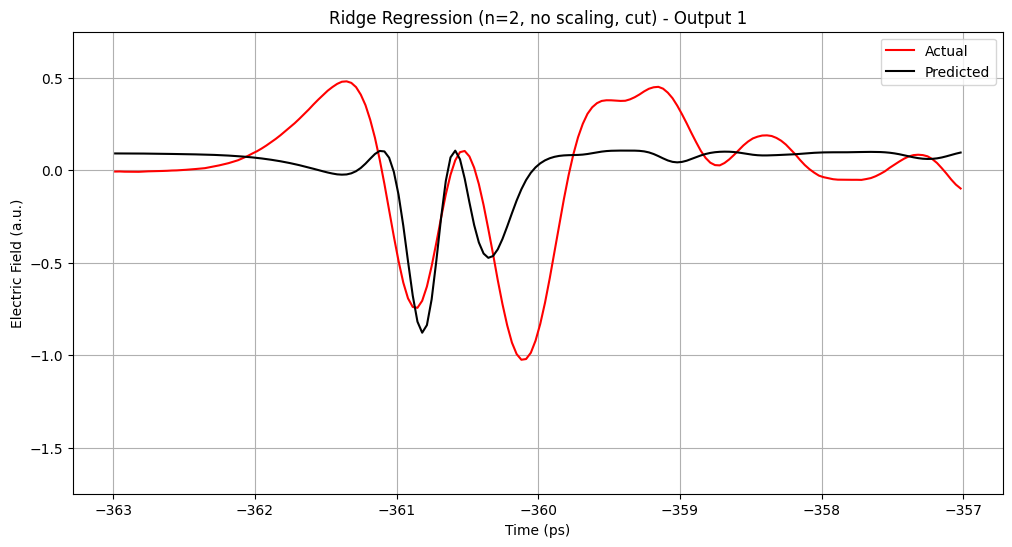

Lasso | n=2, alpha=0.01 | MSE = 0.077830


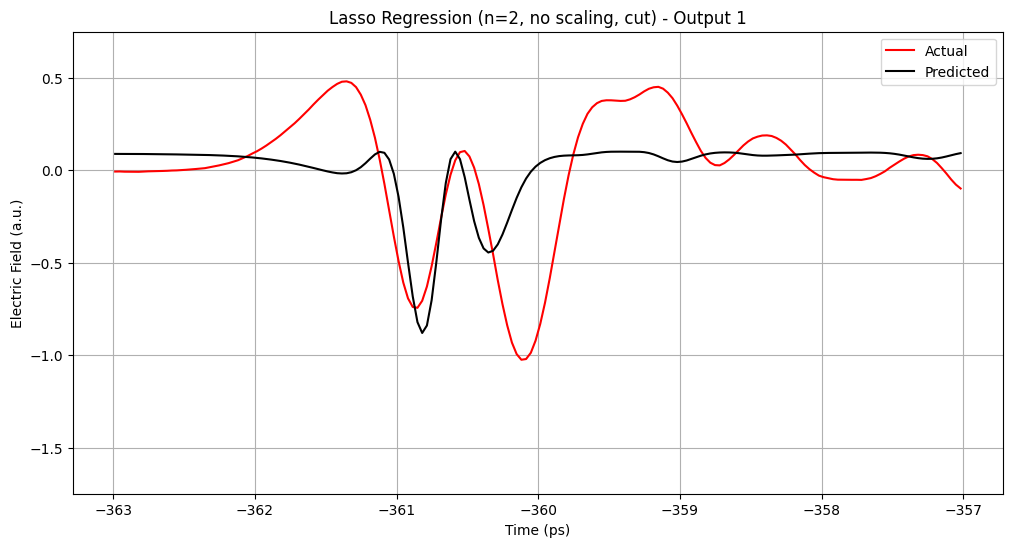

Ridge | n=5, alpha=0.5 | MSE = 0.074280


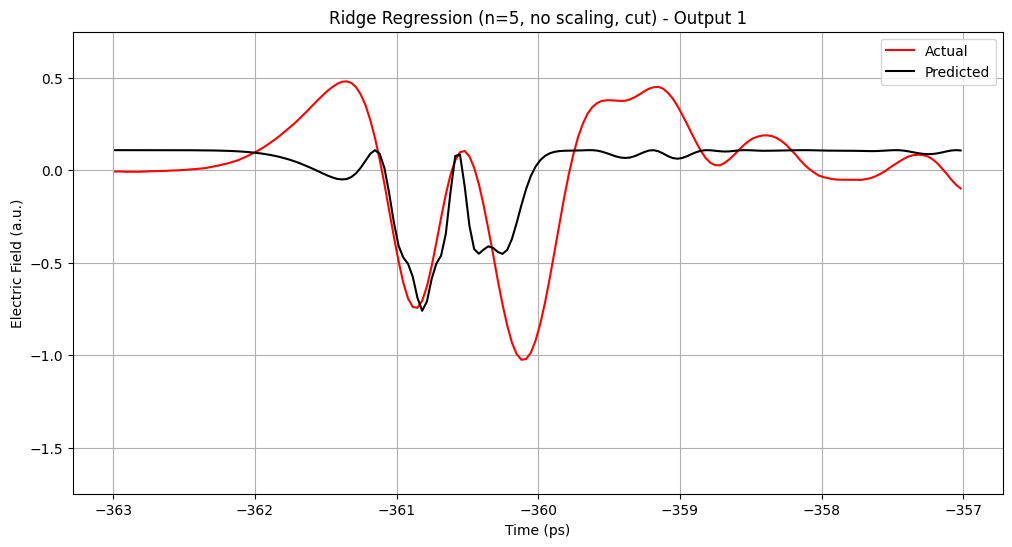

Lasso | n=5, alpha=0.01 | MSE = 0.074338


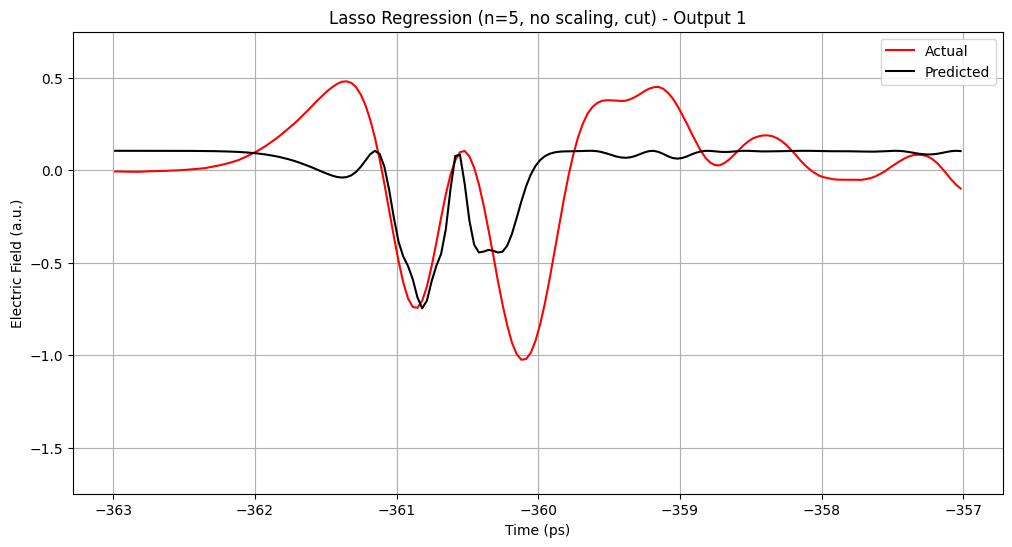

Ridge | n=10, alpha=0.5 | MSE = 0.067827


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.09279e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


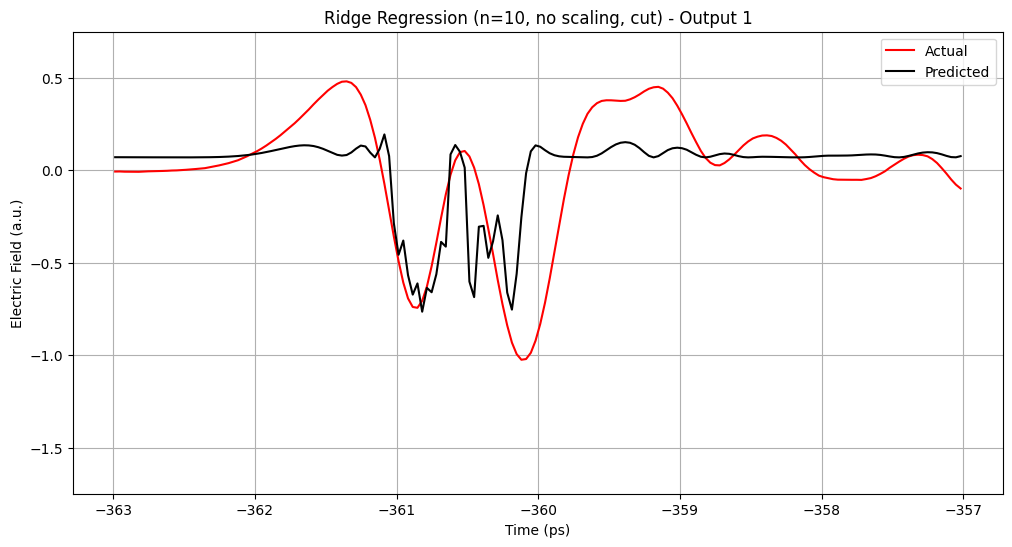

Lasso | n=10, alpha=0.01 | MSE = 0.072332


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.523e+00, tolerance: 2.015e-03
  model = cd_fast.enet_coordinate_descent(


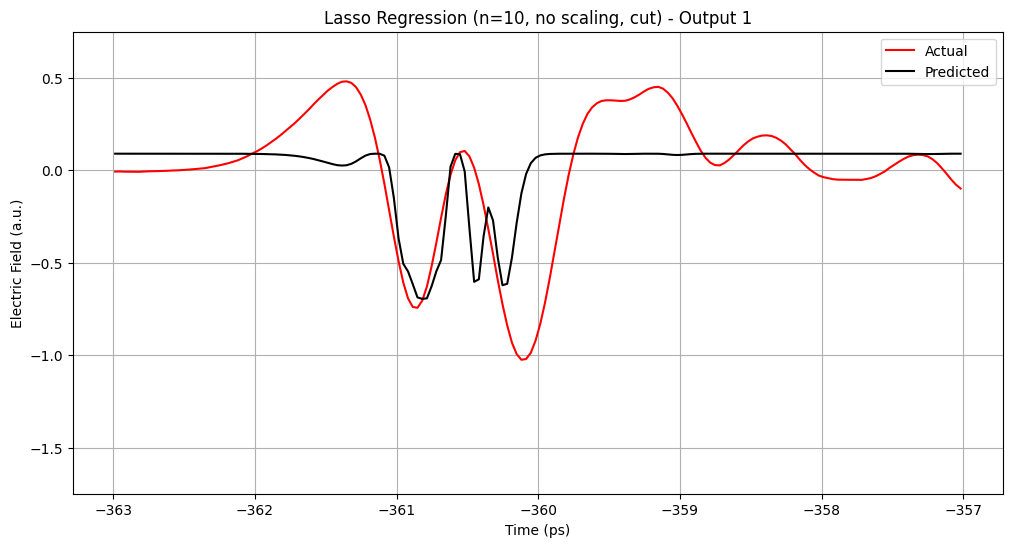


üî∑ Ridge / Lasso results for Output 2 (No Scaling, Cut):
Ridge | n=2, alpha=0.5 | MSE = 0.058577


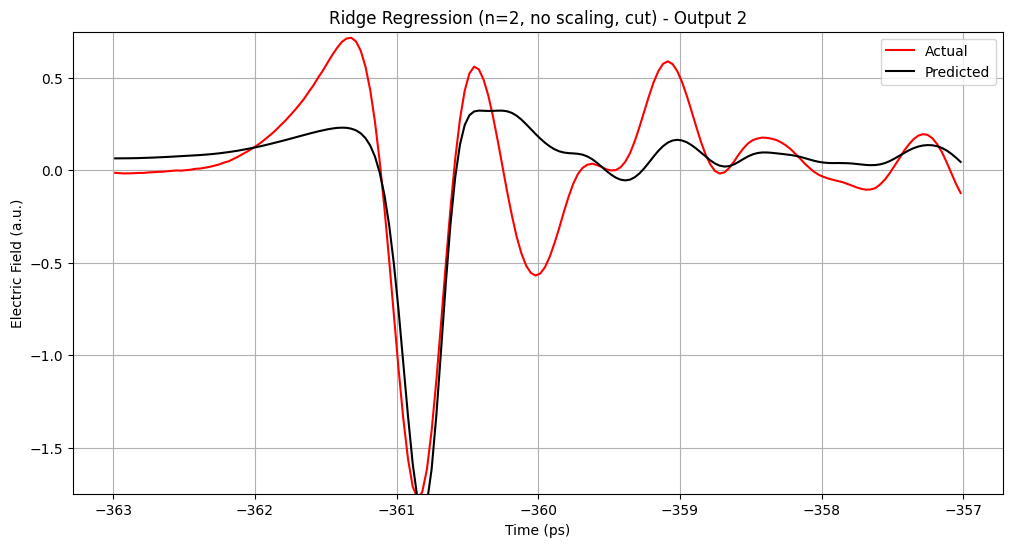

Lasso | n=2, alpha=0.01 | MSE = 0.058608


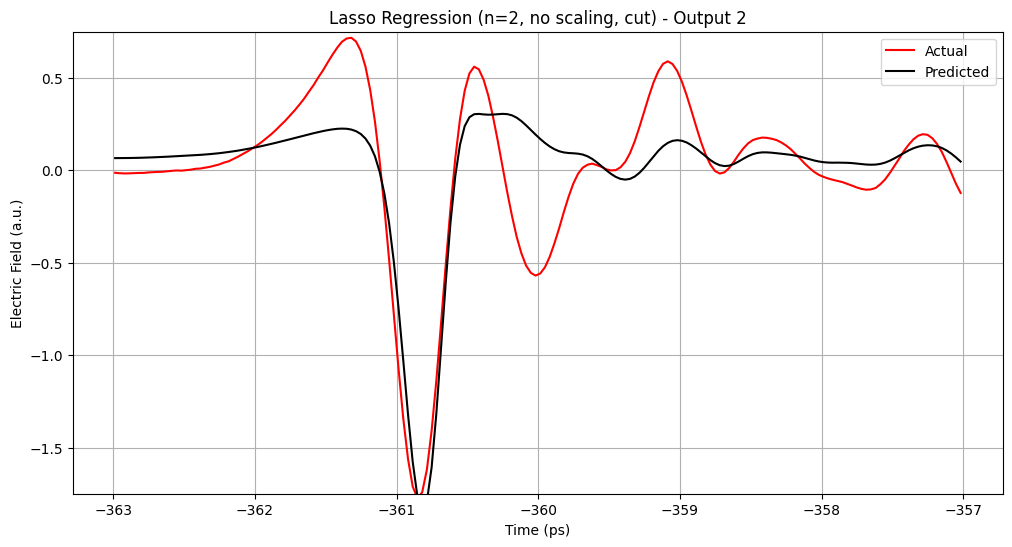

Ridge | n=5, alpha=0.5 | MSE = 0.056950


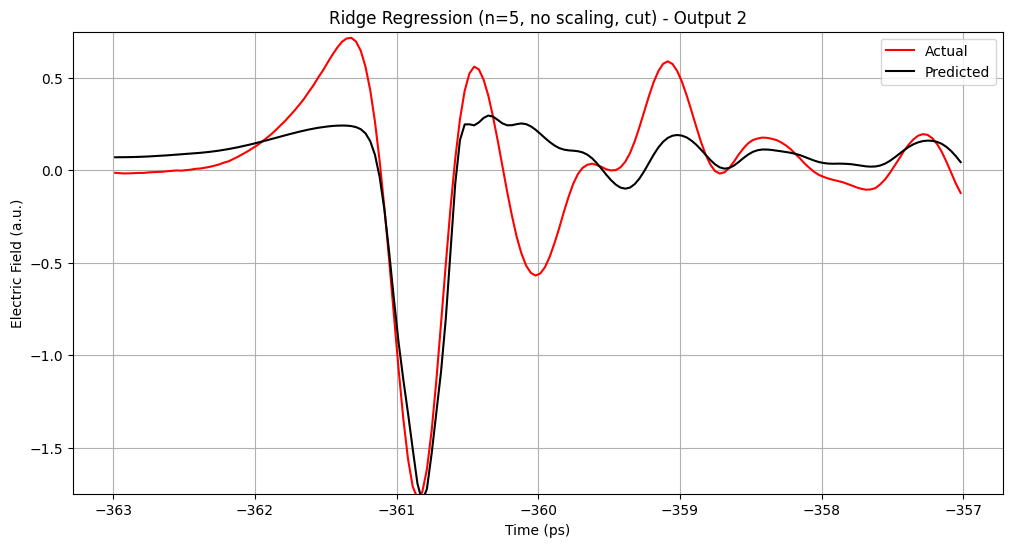

Lasso | n=5, alpha=0.01 | MSE = 0.057362


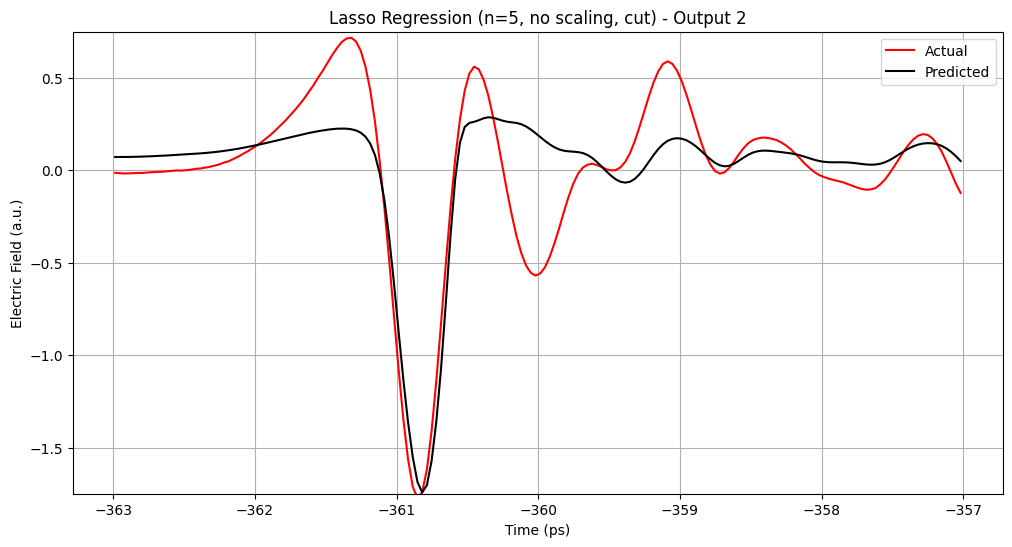

Ridge | n=10, alpha=0.5 | MSE = 0.051634


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.09279e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


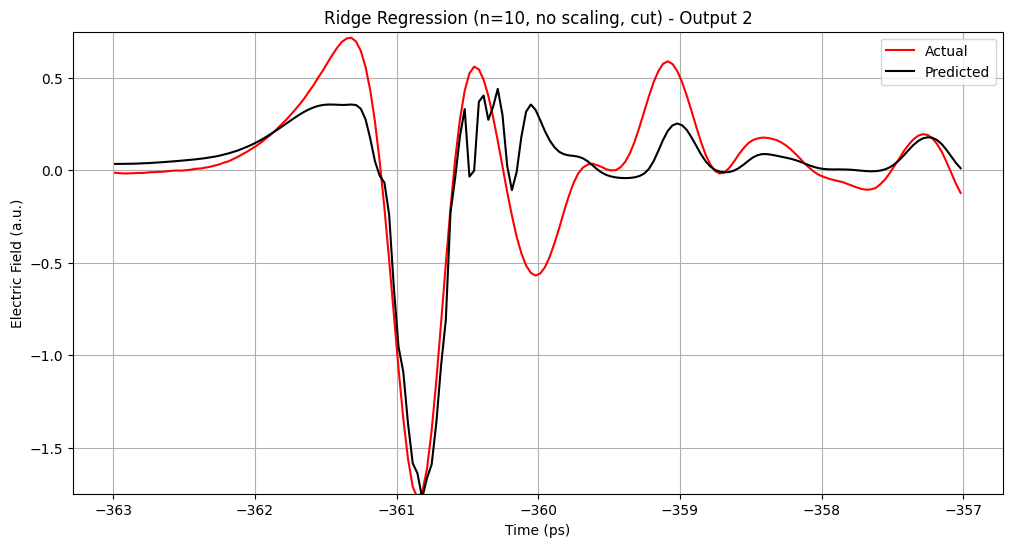

Lasso | n=10, alpha=0.01 | MSE = 0.055349


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.239e+00, tolerance: 3.564e-03
  model = cd_fast.enet_coordinate_descent(


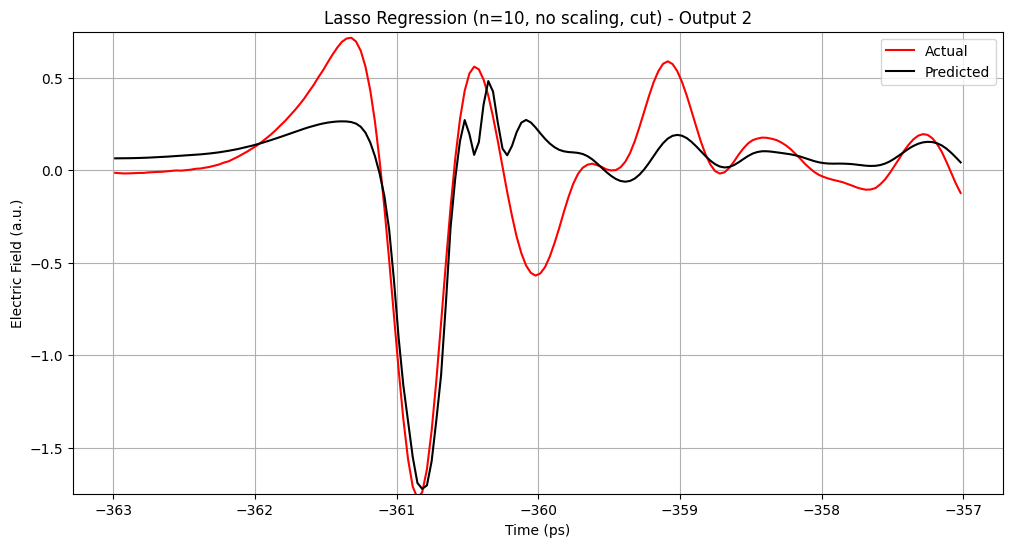

In [45]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def train_and_plot_no_scaling_cut(E_input_cut, E_output_cut, n, model_type, alpha, t_cut, title):
    """
    ’à÷Ç’Ω’∏÷Ç÷Å’°’∂’∏÷Ç’¥ ’ß Ridge ’Ø’°’¥ Lasso ’º’•’£÷Ä’•’Ω’´’∏’∂ ’¥’∏’§’•’¨’ù ’°’º’°’∂÷Å ’∂’∏÷Ä’¥’°’æ’∏÷Ä’¥’°’∂,
    ’ø÷Ä’æ’°’Æ ’∫’∏’¨’´’∂’∏’¥ ’°’Ω’ø’´’≥’°’∂’∏’æ ÷á ’Ø’ø÷Ä’°’Æ ’∞’°’ø’æ’°’Æ’´ ’æ÷Ä’°,
    ’°’∫’° ’∂’Ø’°÷Ä’∏÷Ç’¥ ’ß ’´÷Ä’°’Ø’°’∂ ÷á ’Ø’°’∂’≠’°’ø’•’Ω’æ’°’Æ ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä’® ’™’°’¥’°’∂’°’Ø’´ ’∂’Ø’°’ø’¥’°’¥’¢÷â

    ’Ñ’∏÷Ç’ø÷Ñ’ù
        E_input_cut: numpy ’¶’°’∂’£’æ’°’Æ, trimmed input electric field
        E_output_cut: numpy ’¶’°’∂’£’æ’°’Æ, trimmed output electric field
        n: ’∫’∏’¨’´’∂’∏’¥’´ ’°’Ω’ø’´’≥’°’∂
        model_type: 'ridge' ’Ø’°’¥ 'lasso'
        alpha: regularization ’∏÷Ç’™’®
        t_cut: numpy ’¶’°’∂’£’æ’°’Æ, trimmed ’™’°’¥’°’∂’°’Ø’°’µ’´’∂ ’°’º’°’∂÷Å÷Ñ
        title: ’£÷Ä’°÷Ü’´’Ø’´ ’æ’•÷Ä’∂’°’£’´÷Ä
    """

    # ’ç’ø’•’≤’Æ’∏÷Ç’¥ ’•’∂÷Ñ ’∫’∏’¨’´’∂’∏’¥’°’µ’´’∂ ÷Ü’´’π’•÷Ä’∂’•÷Ä’ù E_input_cut^1 ... E_input_cut^n
    X = np.column_stack([E_input_cut**i for i in range(1, n+1)])
    y = E_output_cut

    # ‘∏’∂’ø÷Ä’∏÷Ç’¥ ÷á ’Ω’ø’•’≤’Æ’∏÷Ç’¥ ’¥’∏’§’•’¨’®
    if model_type == 'ridge':
        model = Ridge(alpha=alpha)
    elif model_type == 'lasso':
        model = Lasso(alpha=alpha, max_iter=100000)
    else:
        raise ValueError("Unknown model type.")

    # ’à÷Ç’Ω’∏÷Ç÷Å’°’∂’∏÷Ç’¥ ’•’∂÷Ñ ’¥’∏’§’•’¨’®
    model.fit(X, y)

    # ‘ø’°’∂’≠’°’ø’•’Ω’∏÷Ç’¥ ’•’∂÷Ñ ’∂’∏÷Ç’µ’∂ ’ø’´÷Ä’∏÷Ç’µ’©’∏÷Ç’¥
    y_pred = model.predict(X)

    # ’Ä’°’∑’æ’∏÷Ç’¥ ’•’∂÷Ñ MSE
    mse = mean_squared_error(y, y_pred)
    print(f"{model_type.capitalize()} | n={n}, alpha={alpha} | MSE = {mse:.6f}")

    # ’ä’°’ø’Ø’•÷Ä’®’ù ’´÷Ä’°’Ø’°’∂ ÷á ’Ø’°’∂’≠’°’ø’•’Ω’æ’°’Æ ’°’¶’§’°’∂’∑’°’∂’∂’•÷Ä ’™’°’¥’°’∂’°’Ø’´ ’∂’Ø’°’ø’¥’°’¥’¢
    plt.figure(figsize=(12, 6))
    plt.plot(t_cut, y, label='Actual', color='red')
    plt.plot(t_cut, y_pred, label='Predicted', color='black')
    plt.xlabel('Time (ps)')
    plt.ylabel('Electric Field (a.u.)')
    plt.title(title)
    plt.ylim(-1.75, 0.75)
    plt.grid(True)
    plt.legend()
    plt.show()
n_values = [2, 5, 10]
alphas = {'ridge': 0.5, 'lasso': 0.01}

mask = (input_data_1['Time (ps)'].values >= -363) & (input_data_1['Time (ps)'].values <= -357)
t_cut = input_data_1['Time (ps)'].values[mask]
E_input_cut = input_data_1['Electric Field (a.u.)'].values[mask]
E_output_cut1 = output_data_1['Electric Field (a.u.)'].values[mask]
E_output_cut2 = output_data_2['Electric Field (a.u.)'].values[mask]

for output_label, E_output_cut in [('Output 1', E_output_cut1), ('Output 2', E_output_cut2)]:
    print(f"\nüî∑ Ridge / Lasso results for {output_label} (No Scaling, Cut):")
    for n in n_values:
        for model_type in ['ridge', 'lasso']:
            title = f"{model_type.capitalize()} Regression (n={n}, no scaling, cut) - {output_label}"
            train_and_plot_no_scaling_cut(
                E_input_cut, E_output_cut, n=n,
                model_type=model_type,
                alpha=alphas[model_type],
                t_cut=t_cut,
                title=title
            )


